# House Prices in India

The aim is to Predict the efficient House Pricing for real estate customers with respect to their budgets and priorities.

# Importing Libraries

In [900]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the Data

In [901]:
train = pd.read_csv("C:/Users/senth/Downloads/train.csv")
test = pd.read_csv("C:/Users/senth/Downloads/test.csv")

In [902]:
train.shape

(29451, 12)

In [903]:
train.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [904]:
test.shape

(68720, 11)

In [905]:
test.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

##### Adding a column to identify whether a row comes from train or not

In [906]:
test['is_train'] = 0
train['is_train'] = 1

is_train ->  if price of house is less than 25 lakhs assign 0 else is_train = 1

###### Combining train and test

In [907]:
data = pd.concat([train,test],ignore_index=True)

In [910]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),is_train
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,1
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,1
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,1
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,1
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Dealer,0,0,3,BHK,1200.082764,1,1,"Satgachi,Kolkata",23.207157,88.404471,58.0,1
96,Dealer,0,0,2,BHK,1584.283904,1,1,"Tilak Nagar,Kanpur",26.459137,79.506922,100.0,1
97,Owner,0,0,2,BHK,900.000000,1,1,"Kalol,Gandhinagar",23.225700,72.516790,18.0,1
98,Dealer,0,1,2,BHK,1193.440032,1,1,"Talegaon,Pune",18.441256,74.647361,60.4,1


In [846]:
data.shape

(98171, 13)

In [847]:
data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'is_train'],
      dtype='object')

In [848]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98171 entries, 0 to 98170
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              98171 non-null  object 
 1   UNDER_CONSTRUCTION     98171 non-null  int64  
 2   RERA                   98171 non-null  int64  
 3   BHK_NO.                98171 non-null  int64  
 4   BHK_OR_RK              98171 non-null  object 
 5   SQUARE_FT              98171 non-null  float64
 6   READY_TO_MOVE          98171 non-null  int64  
 7   RESALE                 98171 non-null  int64  
 8   ADDRESS                98171 non-null  object 
 9   LONGITUDE              98171 non-null  float64
 10  LATITUDE               98171 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
 12  is_train               98171 non-null  int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 9.7+ MB


In [849]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),is_train
count,98171.000000,98171.000000,98171.000000,9.817100e+04,98171.000000,98171.000000,98171.000000,98171.000000,29451.000000,98171.000000
mean,0.177517,0.316947,2.389423,7.874292e+03,0.822483,0.932322,21.291708,76.894881,142.898746,0.299997
std,0.382107,0.465289,0.868954,1.050427e+06,0.382107,0.251194,6.186898,10.240142,656.880713,0.458259
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-121.761248,0.250000,0.000000
25%,0.000000,0.000000,2.000000,9.000277e+02,1.000000,1.000000,18.452663,73.798100,38.000000,0.000000
50%,0.000000,0.000000,2.000000,1.175007e+03,1.000000,1.000000,20.904426,77.324966,62.000000,0.000000
75%,0.000000,1.000000,3.000000,1.550388e+03,1.000000,1.000000,26.893640,77.968485,100.000000,1.000000
max,1.000000,1.000000,31.000000,2.545455e+08,1.000000,1.000000,65.183330,175.278040,30000.000000,1.000000


In [850]:
data.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     19
BHK_OR_RK                    2
SQUARE_FT                48733
READY_TO_MOVE                2
RESALE                       2
ADDRESS                  13322
LONGITUDE                 6801
LATITUDE                  6803
TARGET(PRICE_IN_LACS)     1172
is_train                     2
dtype: int64

In [851]:
data.POSTED_BY.unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [852]:
data.isnull().sum()

POSTED_BY                    0
UNDER_CONSTRUCTION           0
RERA                         0
BHK_NO.                      0
BHK_OR_RK                    0
SQUARE_FT                    0
READY_TO_MOVE                0
RESALE                       0
ADDRESS                      0
LONGITUDE                    0
LATITUDE                     0
TARGET(PRICE_IN_LACS)    68720
is_train                     0
dtype: int64

In [853]:
train['TARGET(PRICE_IN_LACS)'].isnull().mean()

0.0

We can drop LONGITUDE and LATITUDE which does not affect TARGET(PRICE_IN_LACS)

In [854]:
data.drop(['LONGITUDE','LATITUDE'],axis = 1,inplace = True)

### Extract city from address

In [855]:
data['ADDRESS'] = data['ADDRESS'].str.split(',').apply(lambda x: x[-1])
data['ADDRESS'].value_counts().head(15)

Bangalore      14341
Lalitpur       10063
Pune            6591
Mumbai          6539
Kolkata         5850
Noida           5826
Maharashtra     5258
Chennai         4136
Ghaziabad       3604
Jaipur          3229
Chandigarh      2186
Faridabad       2127
Mohali          1882
Vadodara        1853
Surat           1449
Name: ADDRESS, dtype: int64

Map all cities into tier-1, tier-2 and tier-3

Reference https://en.wikipedia.org/wiki/Classification_of_Indian_cities

In [856]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'tier-1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier-2'
    else:
        return 'tier-3'
data['CITY_TIER'] = data['ADDRESS'].apply(map_city)

In [857]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),is_train,CITY_TIER
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,55.0,1,tier-1
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,51.0,1,tier-2
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,43.0,1,tier-1
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,62.5,1,tier-2
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,60.5,1,tier-1


In [858]:
categorical_features = ['POSTED_BY','BHK_OR_RK','ADDRESS','CITY_TIER']
numerical_features = ['UNDER_CONSTRUCTION','RERA','BHK_NO.','SQUARE_FT', 'READY_TO_MOVE', 'RESALE']

# Checking for Outliers in Numerical Features

In [859]:
numerical_features = ['UNDER_CONSTRUCTION','RERA','BHK_NO.','SQUARE_FT', 'READY_TO_MOVE', 'RESALE']
data_num = data[numerical_features]
data_num.describe()

Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1
((data_num < (Q1 - 1.5 * IQR)) | (data_num > (Q3 + 1.5 * IQR))).any()

UNDER_CONSTRUCTION     True
RERA                  False
BHK_NO.                True
SQUARE_FT              True
READY_TO_MOVE          True
RESALE                 True
dtype: bool

There are outliers in numerical features detected with the IQR method.

Continuous Data BHK_NO.,SQUARE_FT and TARGET(PRICE_IN_LACS)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x198116532b0>,
 'caps': [<matplotlib.lines.Line2D at 0x198116539d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19811764ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1982adc0130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1982adc04c0>],
 'means': []}

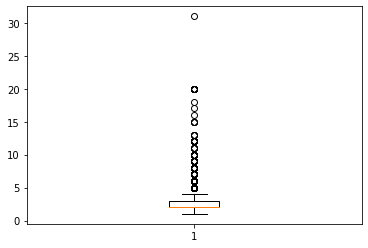

In [860]:
plt.boxplot(data['BHK_NO.'])

In [861]:
Q1 = data['BHK_NO.'].quantile(0.25)
Q3 = data['BHK_NO.'].quantile(0.75)
IQR = Q3 - Q1

In [862]:
UE = Q3 + 1.5 * (IQR)
LE = Q1 - 1.5 * (IQR)

In [863]:
data['BHK_NO.'][data['BHK_NO.']>UE]=UE
data['BHK_NO.'][data['BHK_NO.']<LE]=LE

C:\Users\senth\AppData\Local\Temp/ipykernel_15244/2566831775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BHK_NO.'][data['BHK_NO.']>UE]=UE
C:\Users\senth\AppData\Local\Temp/ipykernel_15244/2566831775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BHK_NO.'][data['BHK_NO.']<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x19857753e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1985773f580>,
 'boxes': [<matplotlib.lines.Line2D at 0x19857753a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1985773fca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1981f420070>],
 'means': []}

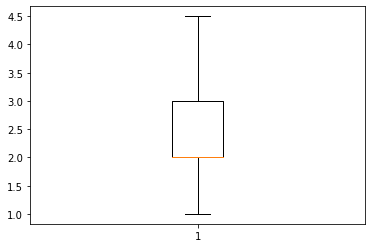

In [864]:
plt.boxplot(data['BHK_NO.'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1985a2ba550>,
 'caps': [<matplotlib.lines.Line2D at 0x1985a2bac70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1985a2ba1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1985a2a33d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1985a2a3760>],
 'means': []}

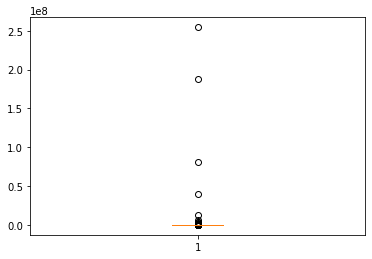

In [865]:
plt.boxplot(data['SQUARE_FT'])

In [866]:
Q1 = data['SQUARE_FT'].quantile(0.25)
Q3 = data['SQUARE_FT'].quantile(0.75)
IQR = Q3 - Q1

In [867]:
UE = Q3 + 1.5 * (IQR)
LE = Q1 - 1.5 * (IQR)

In [868]:
data['SQUARE_FT'][data['SQUARE_FT']>UE]=UE
data['SQUARE_FT'][data['SQUARE_FT']<LE]=LE

C:\Users\senth\AppData\Local\Temp/ipykernel_15244/1657066256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SQUARE_FT'][data['SQUARE_FT']>UE]=UE
C:\Users\senth\AppData\Local\Temp/ipykernel_15244/1657066256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SQUARE_FT'][data['SQUARE_FT']<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x19857902e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1985ed815e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19857902af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1985ed81d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1985ed6b0d0>],
 'means': []}

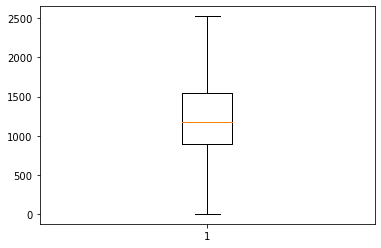

In [869]:
plt.boxplot(data['SQUARE_FT'])

# DATA VISUALIZATION

### UNDER_CONSTRUCTION Vs TARGET PRICE

<AxesSubplot:xlabel='UNDER_CONSTRUCTION', ylabel='TARGET(PRICE_IN_LACS)'>

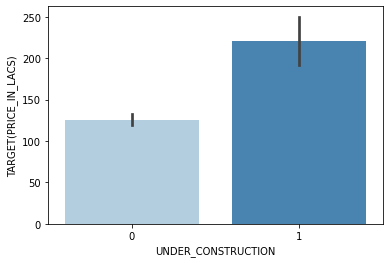

In [870]:
sns.barplot(x = data['UNDER_CONSTRUCTION'], y = data['TARGET(PRICE_IN_LACS)'], palette='Blues')

The House UNDER_CONSTRUCTION contribute Higher Prices

### RERA Vs TARGET PRICE

<AxesSubplot:xlabel='RERA', ylabel='TARGET(PRICE_IN_LACS)'>

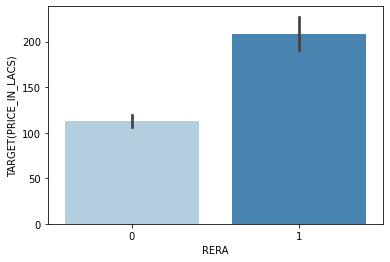

In [871]:
sns.barplot(x = data['RERA'], y = data['TARGET(PRICE_IN_LACS)'],palette='Blues')

It is clear that from the above barplot the price of house with RERA approval is valued higher price than the house without RERA approval

### RESALE Vs TARGET PRICE 

<AxesSubplot:xlabel='RESALE', ylabel='TARGET(PRICE_IN_LACS)'>

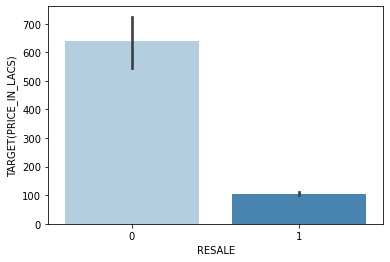

In [872]:
sns.barplot(x = data['RESALE'], y = data['TARGET(PRICE_IN_LACS)'],palette='Blues')

It's clear from the above Barplot that the price of a brand new house is higher than the price of the house which is resold

### BHK_OR_RK Vs TARGET PRICE

<AxesSubplot:xlabel='BHK_OR_RK', ylabel='TARGET(PRICE_IN_LACS)'>

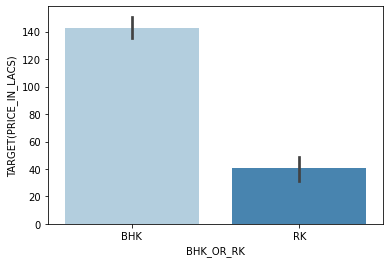

In [873]:
sns.barplot(x = data['BHK_OR_RK'], y = data['TARGET(PRICE_IN_LACS)'],palette='Blues')

The price of house with BHK(Bedroom, Hall, Kitchen) is costlier than a house with only RK(Room, Kichen).

### POSTED_BY Vs TARGET PRICE 

<AxesSubplot:xlabel='POSTED_BY', ylabel='TARGET(PRICE_IN_LACS)'>

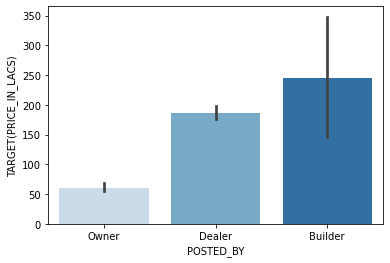

In [874]:
sns.barplot(x = data['POSTED_BY'], y = data['TARGET(PRICE_IN_LACS)'],palette='Blues')

The houses posted by Builder gets sold for higher price, followed by dealer and Owner

#####  Dropping TARGET(PRICE_IN_LACS) column as it is not present in the test 

In [875]:
data = data.drop(['TARGET(PRICE_IN_LACS)'],axis = 1)

# Data Preparation

# Converting Categorical Features

Converting the categorical data to numerical values

In [876]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [877]:
data.ADDRESS = label_encoder.fit_transform(data.ADDRESS)

In [878]:
data.ADDRESS.unique()

array([ 24, 196,  97, 166, 163, 126, 190,  60, 273, 209, 239,  49, 311,
       234, 194, 201,  73,  46,  89, 174, 180, 299, 307, 301, 185,  19,
       213, 305,  33,  48, 176, 151,  94, 231,   1, 249, 106, 297, 123,
       141,  64, 300, 217, 283, 302, 107,  10,  14, 294, 266, 241, 309,
       291, 265, 179,  58, 267, 108, 243, 280,   7,  35, 257,  77, 175,
        84, 221, 279,  83,  98, 135, 117, 124, 120, 192, 121, 156, 228,
        53, 251, 188, 170, 129,  12, 227, 177,   8, 169, 220, 165,  86,
        42,  41,  18, 137, 186,  15,  85,  43,  72, 104, 130, 296, 105,
       206, 115, 274, 118, 171,  75, 205,  22, 207,  80, 293,  67, 114,
       202, 134, 148, 145, 152, 125, 223, 195, 263, 139,  93, 143, 191,
         2, 131,  47, 214, 150, 155,   4, 140,  96,   9,   3, 109,  78,
       233, 167, 211,  39,  27, 245, 219,   6,  87, 259, 285, 210, 208,
       235,  69, 270, 278,  70, 144, 147,   0, 310, 111, 212,  38,  28,
       255,  59,  55, 138,  45, 172,  13, 112, 261, 113, 298, 29

In [879]:
data['POSTED_BY'] = label_encoder.fit_transform(data['POSTED_BY'])

In [880]:
data['BHK_OR_RK'] = label_encoder.fit_transform(data['BHK_OR_RK'])

In [881]:
data.CITY_TIER = label_encoder.fit_transform(data.CITY_TIER)

In [882]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,is_train,CITY_TIER
0,2,0,0,2.0,0,1300.236407,1,1,24,1,0
1,1,0,0,2.0,0,1275.000000,1,1,196,1,1
2,2,0,0,2.0,0,933.159722,1,1,24,1,0
3,2,0,1,2.0,0,929.921143,1,1,97,1,1
4,1,1,0,2.0,0,999.009247,0,1,166,1,0


We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't able to take those features as inputs directly

In [883]:
dummy = pd.get_dummies(data)
dummy

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,is_train,CITY_TIER
0,2,0,0,2.0,0,1300.236407,1,1,24,1,0
1,1,0,0,2.0,0,1275.000000,1,1,196,1,1
2,2,0,0,2.0,0,933.159722,1,1,24,1,0
3,2,0,1,2.0,0,929.921143,1,1,97,1,1
4,1,1,0,2.0,0,999.009247,0,1,166,1,0
...,...,...,...,...,...,...,...,...,...,...,...
98166,1,0,1,2.0,0,856.555505,1,1,180,0,0
98167,1,0,1,3.0,0,2304.147465,1,1,190,0,2
98168,1,1,1,1.0,0,2525.927453,0,0,180,0,0
98169,1,0,0,2.0,0,1173.708920,1,1,234,0,0


In [884]:
from sklearn.preprocessing import MinMaxScaler

In [885]:
scaler = MinMaxScaler()
model = scaler.fit(data)

In [886]:
scaled_data = model.transform(data)

In [887]:
scaled_data1=pd.DataFrame(scaled_data)

In [888]:
scaled_data1.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,98171.000000,98171.000000,98171.000000,98171.000000,98171.000000,98171.000000,98171.000000,98171.000000,98171.000000,98171.000000,98171.000000
mean,0.670483,0.177517,0.316947,0.393276,0.000835,0.500660,0.822483,0.932322,0.461281,0.299997,0.382588
std,0.257464,0.382107,0.465289,0.226425,0.028889,0.211655,0.382107,0.251194,0.255043,0.458259,0.380872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.285714,0.000000,0.356061,1.000000,1.000000,0.191083,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.285714,0.000000,0.464967,1.000000,1.000000,0.554140,0.000000,0.500000
75%,1.000000,0.000000,1.000000,0.571429,0.000000,0.613636,1.000000,1.000000,0.617834,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train-Test Split

In [889]:
x = data.drop('is_train',axis = 1).values
y = data['is_train'].values

In [890]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=5)

# Logistic Regression

In [911]:
from sklearn.linear_model import LogisticRegression

In [912]:
model=LogisticRegression()

In [913]:
model.fit(x_train,y_train)

LogisticRegression()

In [914]:
predicted_y=model.predict(x_test)

In [979]:
abc = model.score(x_test,y_test)

In [916]:
from sklearn.metrics import confusion_matrix

In [917]:
confusion_matrix(y_test,predicted_y)

array([[13755,     0],
       [ 5880,     0]], dtype=int64)

In [918]:
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report

In [919]:
precision_score(y_test, predicted_y, average=None)

C:\Users\senth\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.70053476, 0.        ])

In [920]:
recall_score(y_test, predicted_y, average=None)

array([1., 0.])

In [921]:
f1_score(y_test, predicted_y, average=None)

array([0.82389937, 0.        ])

In [952]:
pd.DataFrame(classification_report(y_test,predicted_y,output_dict = True,zero_division = 1)).T  #zeo_division for removing warning

,precision,recall,f1-score,support
0,0.700535,1.000000,0.823899,13755.000000
1,1.000000,0.000000,0.000000,5880.000000
accuracy,0.700535,0.700535,0.700535,0.700535
macro avg,0.850267,0.500000,0.411950,19635.000000
weighted avg,0.790214,0.700535,0.577170,19635.000000


# Random Forest

In [943]:
from sklearn.ensemble import RandomForestClassifier

In [944]:
model = RandomForestClassifier(n_estimators = 1000,random_state = 42)

In [945]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [946]:
predict = model.predict(x_test)

In [980]:
mno = model.score(x_test,y_test)

In [948]:
confusion_matrix(y_test,predict)

array([[10376,  3379],
       [ 4367,  1513]], dtype=int64)

In [949]:
precision_score(y_test, predict, average=None)

array([0.70379163, 0.30928046])

In [950]:
recall_score(y_test, predict, average=None)

array([0.75434387, 0.25731293])

In [959]:
f1_score(y_test, predict, average=None)

array([0.72819145, 0.28091348])

In [954]:
pd.DataFrame(classification_report(y_test,predict,output_dict = True)).T

,precision,recall,f1-score,support
0,0.703792,0.754344,0.728191,13755.0000
1,0.309280,0.257313,0.280913,5880.0000
accuracy,0.605500,0.605500,0.605500,0.6055
macro avg,0.506536,0.505828,0.504552,19635.0000
weighted avg,0.585649,0.605500,0.594247,19635.0000


# ADABOOSTING CLASSIFIER

In [956]:
from sklearn.ensemble import AdaBoostClassifier

In [957]:
model = AdaBoostClassifier(n_estimators = 1000,random_state = 42)

In [958]:
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=1000, random_state=42)

In [960]:
predict_y = model.predict(x_test)

In [981]:
xyz = model.score(x_test,y_test)

In [962]:
confusion_matrix(y_test,predict_y)

array([[13746,     9],
       [ 5873,     7]], dtype=int64)

In [963]:
precision_score(y_test, predict_y, average=None)

array([0.70064733, 0.4375    ])

In [964]:
recall_score(y_test, predict_y, average=None)

array([0.99934569, 0.00119048])

In [965]:
f1_score(y_test, predict_y, average=None)

array([0.82375502, 0.00237449])

In [966]:
pd.DataFrame(classification_report(y_test,predict_y,output_dict = True)).T

,precision,recall,f1-score,support
0,0.700647,0.999346,0.823755,13755.000000
1,0.437500,0.001190,0.002374,5880.000000
accuracy,0.700433,0.700433,0.700433,0.700433
macro avg,0.569074,0.500268,0.413065,19635.000000
weighted avg,0.621844,0.700433,0.577780,19635.000000


In [992]:
final = [abc,mno,xyz]
table = [['LOGISTIC REGRESSION',abc],['RANDOM FOREST CLASSIFIER',mno],['ADA BOOSTING CLASSIFIER',xyz]]
print(table)

[['LOGISTIC REGRESSION', 0.7005347593582888], ['RANDOM FOREST CLASSIFIER', 0.7005347593582888], ['ADA BOOSTING CLASSIFIER', 0.7005347593582888]]


In [993]:
print(table[final.index(max(final))]," IS THE BEST FIT!")

['LOGISTIC REGRESSION', 0.7005347593582888]  IS THE BEST FIT!
